# Importing Libraries and Fuctions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


# Dropping constant columns

In [3]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [4]:
df.EmployeeCount.unique() # have to drop it

array([1], dtype=int64)

In [5]:
df.StandardHours.unique() # have to drop it

array([80], dtype=int64)

In [6]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [8]:
df.Over18.unique() #drop

array(['Y'], dtype=object)

In [9]:
df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


# Checking for null values

In [10]:
df.isnull().sum() #no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# VISUALISATION

# MATPLOTLIB and SEABORN

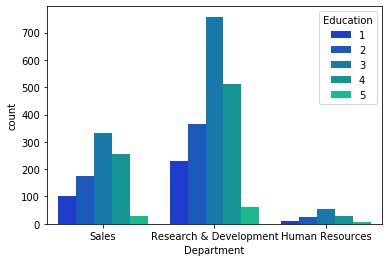

In [11]:
sns.countplot(x=df.Department,hue=df.Education,palette='winter')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


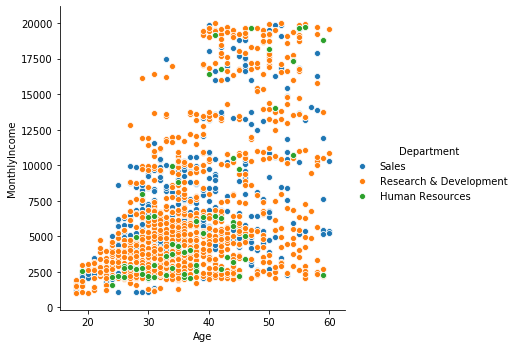

In [12]:
sns.pairplot(data= df,x_vars='Age',y_vars='MonthlyIncome',hue='Department',size=5)

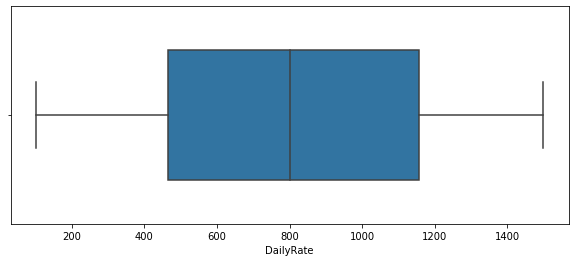

In [14]:
plt.figure(figsize=(10,4))# Even though boxplot is seaborn its size can be controlled by plt figsize command
sns.boxplot(df.DailyRate,orient='h',width=0.6)

In [19]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


# Data Mapping

In [11]:
df['OverTime'] = df.OverTime.map({'No':0,'Yes':1})

In [12]:
# encoding 'Attrtion'
df['Attrition'] = df.Attrition.map({'No':0,'Yes':1})
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [13]:
df.Gender.unique() # Have to do encoding 0,1 .map

array(['Female', 'Male'], dtype=object)

In [14]:
# encoding 'Gender'
df['Gender'] = df.Gender.map({'Male':1,'Female':0})
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7


# CHECKING CORRELATION

In [15]:
cor= df.corr()
cor

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

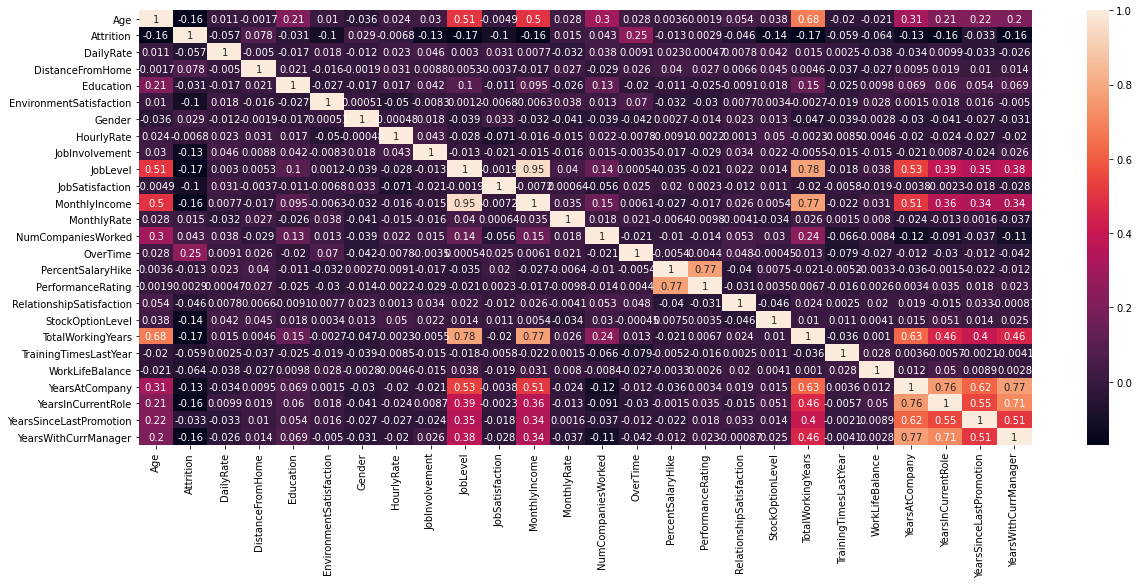

In [16]:
plt.figure(figsize=(20,8)) #joblevel and monthly income highly corelated, age, percentage salary hike,yearsat company
sns.heatmap(cor, annot=True)#yearsince lasrt promotion

In [27]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5


# Removing  highly correlated  columns
    joblevel and monthly income highly corelated, percentage salary hike,yearsat company

In [17]:
df2= df.drop(['JobLevel','YearsAtCompany','YearsSinceLastPromotion'],axis=1,inplace=False)
df2.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,1,11,3,1,0,8,0,1,4,5


In [18]:
cor_=df2.corr()
cor_

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,-0.004892,...,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.212901,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.103481,...,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.160545,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.030571,...,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,0.009932,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,-0.003669,...,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.018845,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,-0.011296,...,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.060236,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,-0.006784,...,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.018007,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,0.033252,...,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.041483,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.071335,...,-0.007782,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.024106,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.021476,...,-0.003507,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,0.008717,0.025976
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,1.000000,...,0.024539,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.002305,-0.027656


<AxesSubplot:>

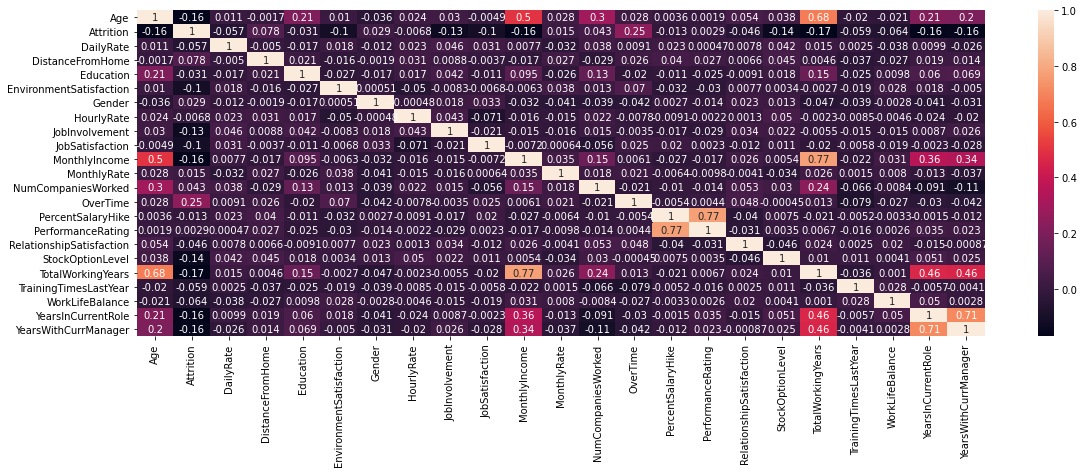

In [19]:
plt.figure(figsize=(19,6)) 
sns.heatmap(cor_, annot=True)

# still some correlation is left

## PERFORMING OHE

In [20]:
df2=pd.get_dummies(df2)
df2.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0


In [21]:
df2.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rar

In [22]:
cor_=df2.corr()
cor_

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,-0.004892,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.103481,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.030571,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,-0.003669,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,-0.011296,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,-0.006784,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,0.033252,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.071335,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.021476,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,1.000000,...,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571


<AxesSubplot:>

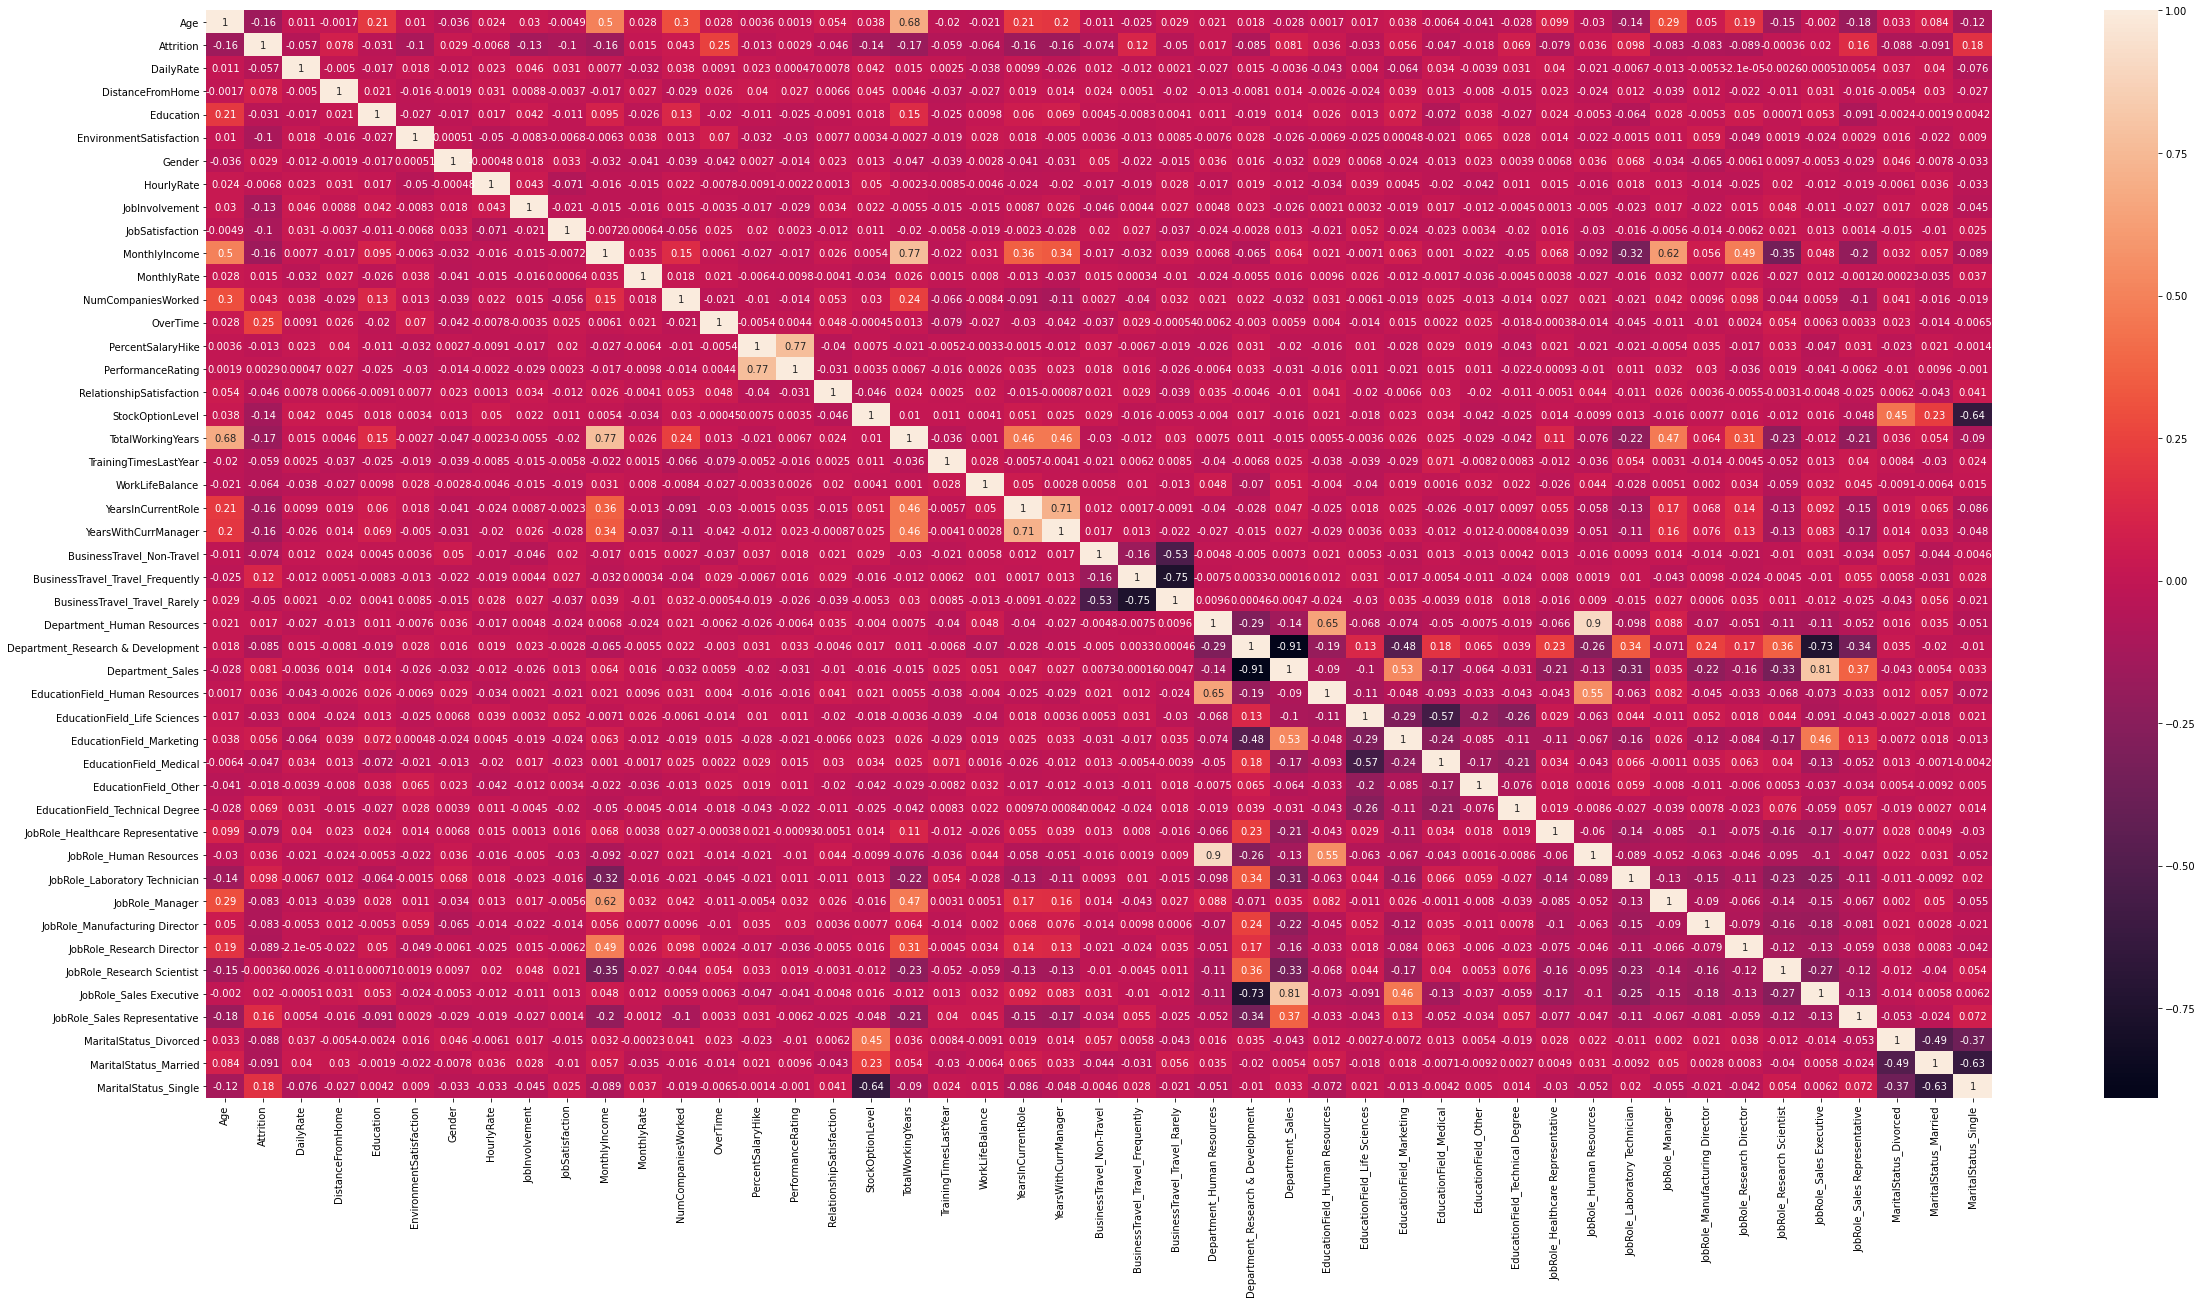

In [24]:
plt.figure(figsize=(40,20))
sns.heatmap(cor_,annot=True)

# Removing highly correlated collumns once again

In [25]:
df3= df2.drop(['BusinessTravel_Travel_Rarely','JobRole_Sales Executive','Department_Research & Development'],axis=1,inplace=False)
df3.head(1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,4,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

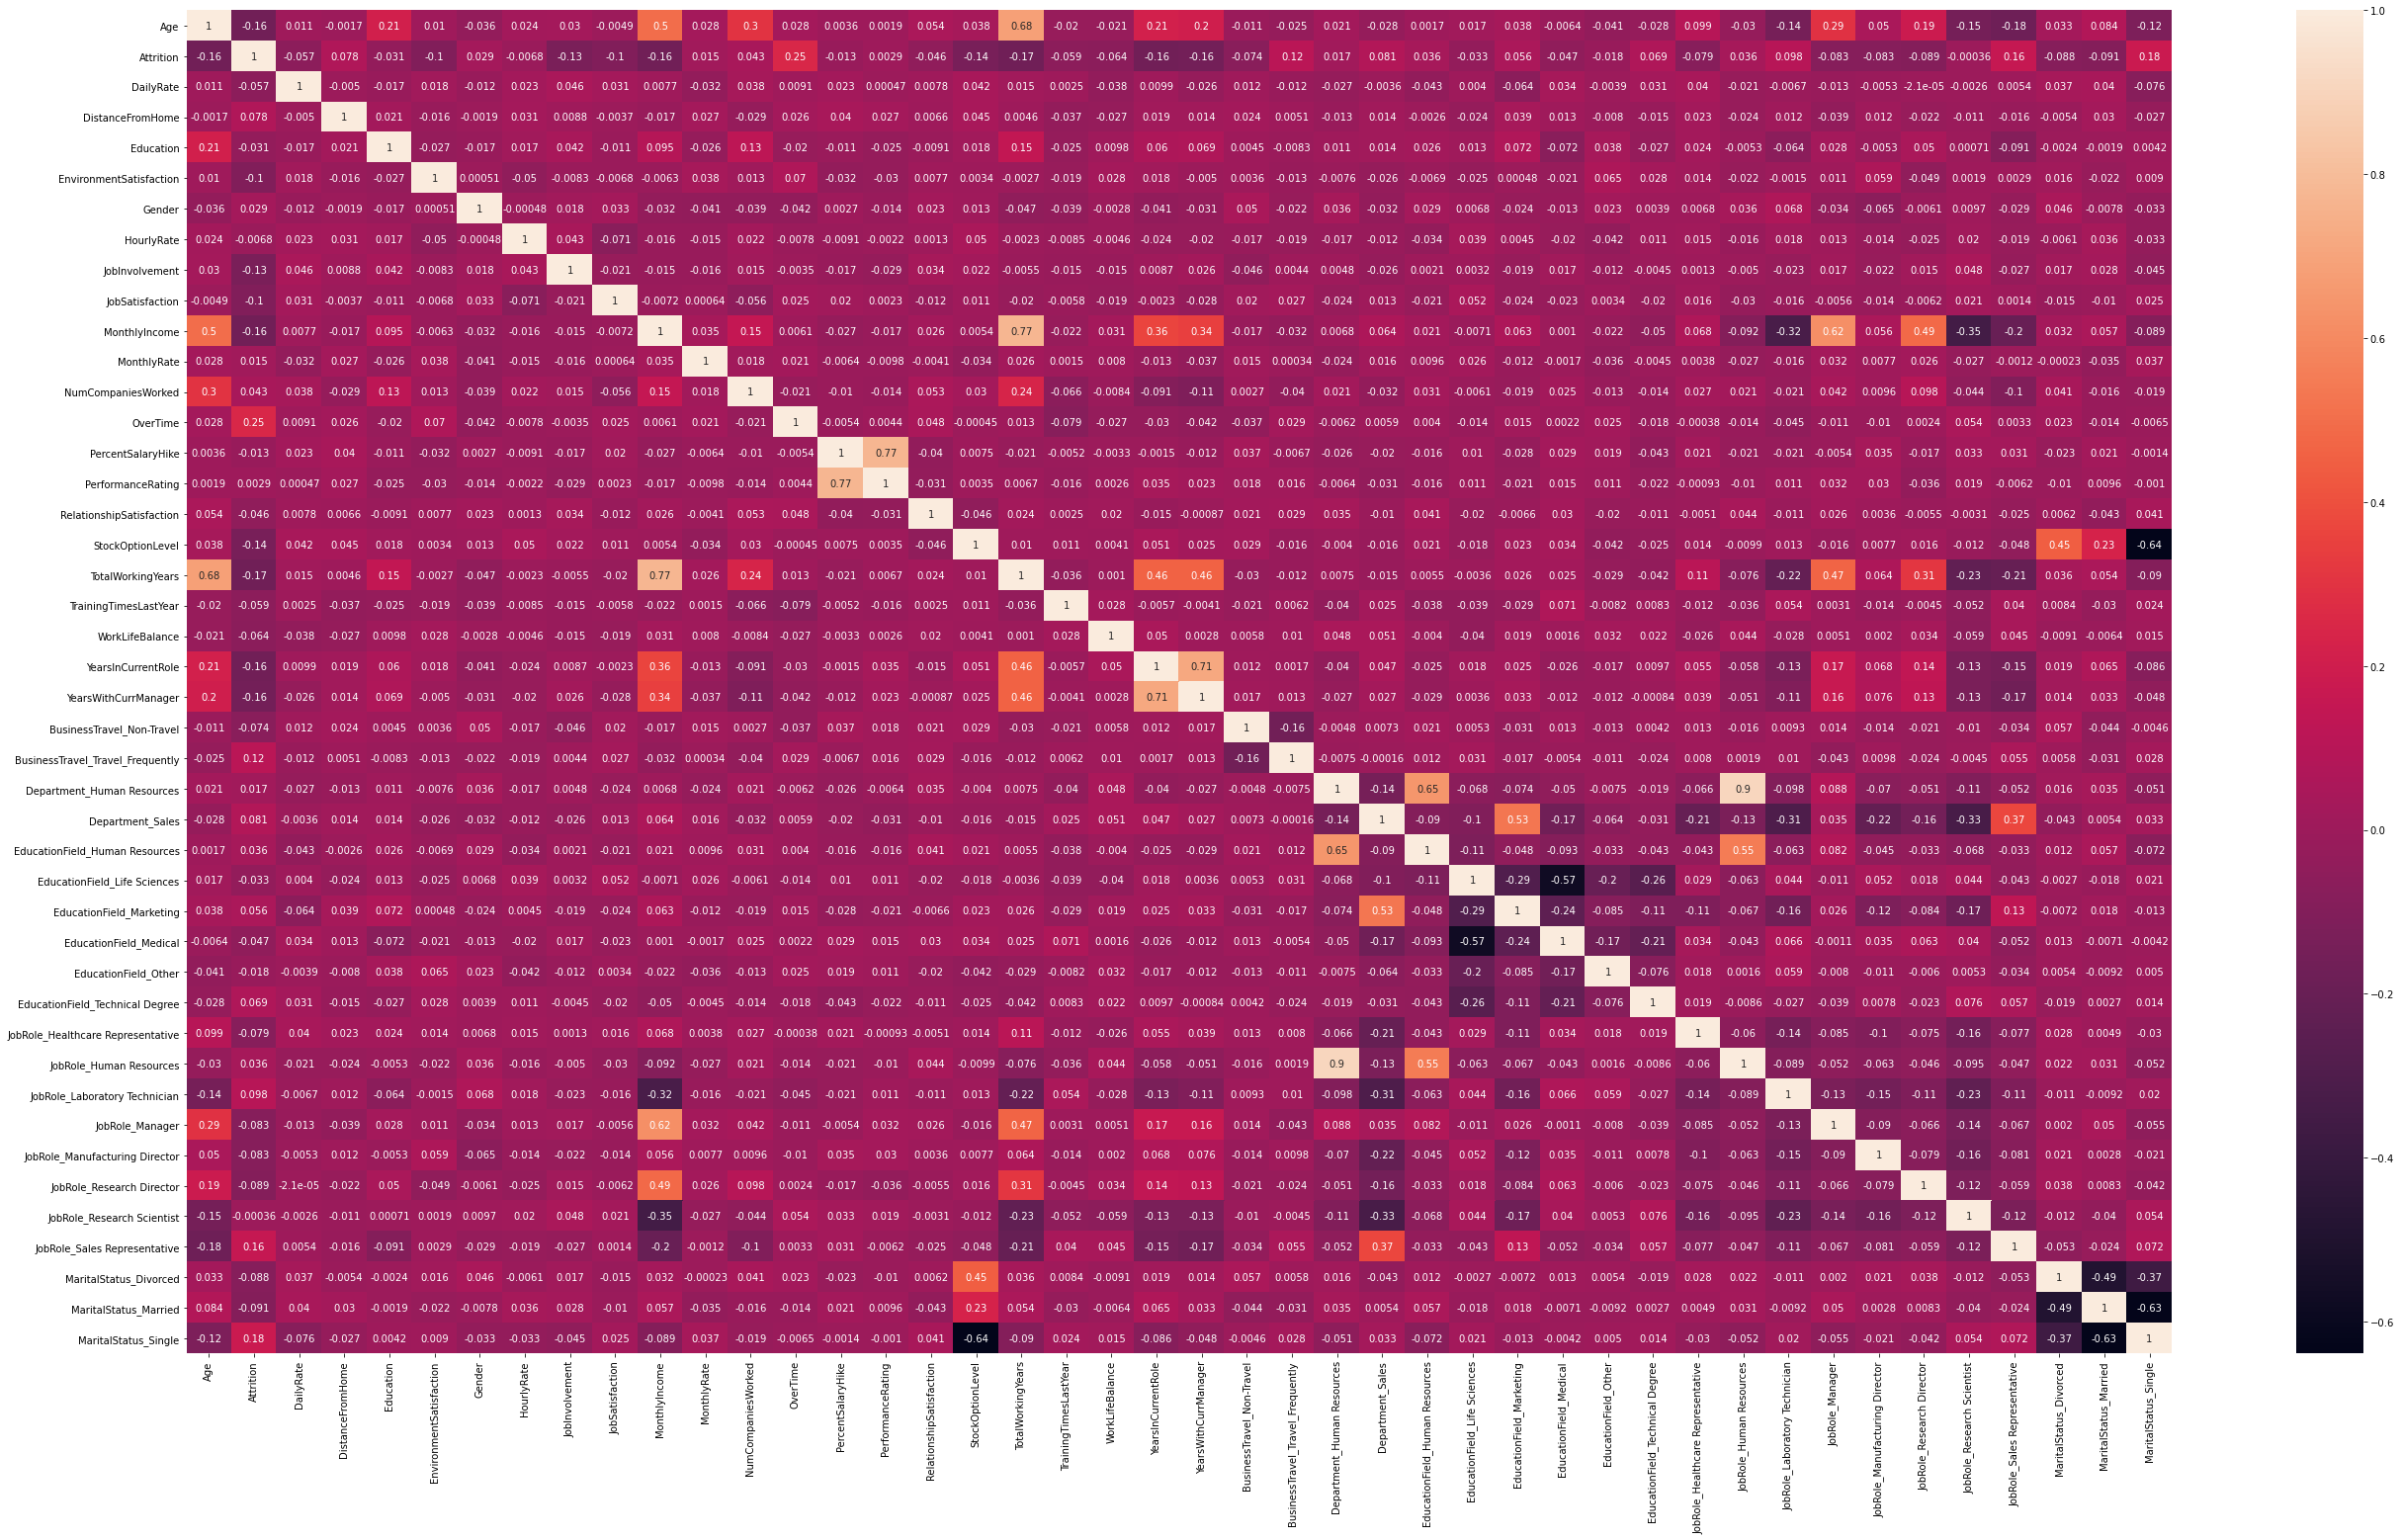

In [26]:
cor_=df3.corr()
plt.figure(figsize=(45,25))
sns.heatmap(cor_,annot=True)

## Importing ML Libraries

In [27]:
## few important functions/methods from sklearn package
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score,auc, f1_score,confusion_matrix
from sklearn.impute import SimpleImputer

In [28]:
df3.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Human Resources',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', '

# spliting training data into train and validation sets

In [29]:
X = df3[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Human Resources',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single']]

In [30]:
y = df3[['Attrition']]

In [31]:
X.shape

(2940, 43)

In [32]:
y.shape

(2940, 1)

#  using scaling 

In [33]:
scale  = StandardScaler()
scale  = scale.fit(X)
X_     = scale.transform(X)  # scaling train features because of the large numerical diffrence between features.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=56, stratify = y)

In [37]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2940, 43)
(2940, 1)
(2352, 43)
(588, 43)
(2352, 1)
(588, 1)


# Model Building

# Randomforest classifier

In [38]:
#### Randomforest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(accuracy_score(y_train, model_rf.predict(X_train)))
print(accuracy_score(y_test, model_rf.predict(X_test)))

<ipython-input-38-3fa9954c40e9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


1.0
0.9659863945578231


In [69]:
model_rf.feature_importances_

array([0.06537589, 0.05802314, 0.04785031, 0.021644  , 0.03111938,
       0.00853905, 0.0506881 , 0.02459879, 0.03103222, 0.08325917,
       0.05008332, 0.03735724, 0.05533542, 0.03744304, 0.00537315,
       0.02641107, 0.02785698, 0.05787683, 0.02784509, 0.02869418,
       0.033633  , 0.03922749, 0.0043155 , 0.01521563, 0.00293191,
       0.01174668, 0.00303022, 0.00757829, 0.0082413 , 0.00881611,
       0.00351316, 0.00880553, 0.00353405, 0.00340364, 0.01191668,
       0.00294727, 0.00401627, 0.00115092, 0.00661589, 0.00695286,
       0.00773867, 0.01007387, 0.0181887 ])

In [75]:
j = X.columns

Text(0.5, 0, 'Random Forest Feature Importance')

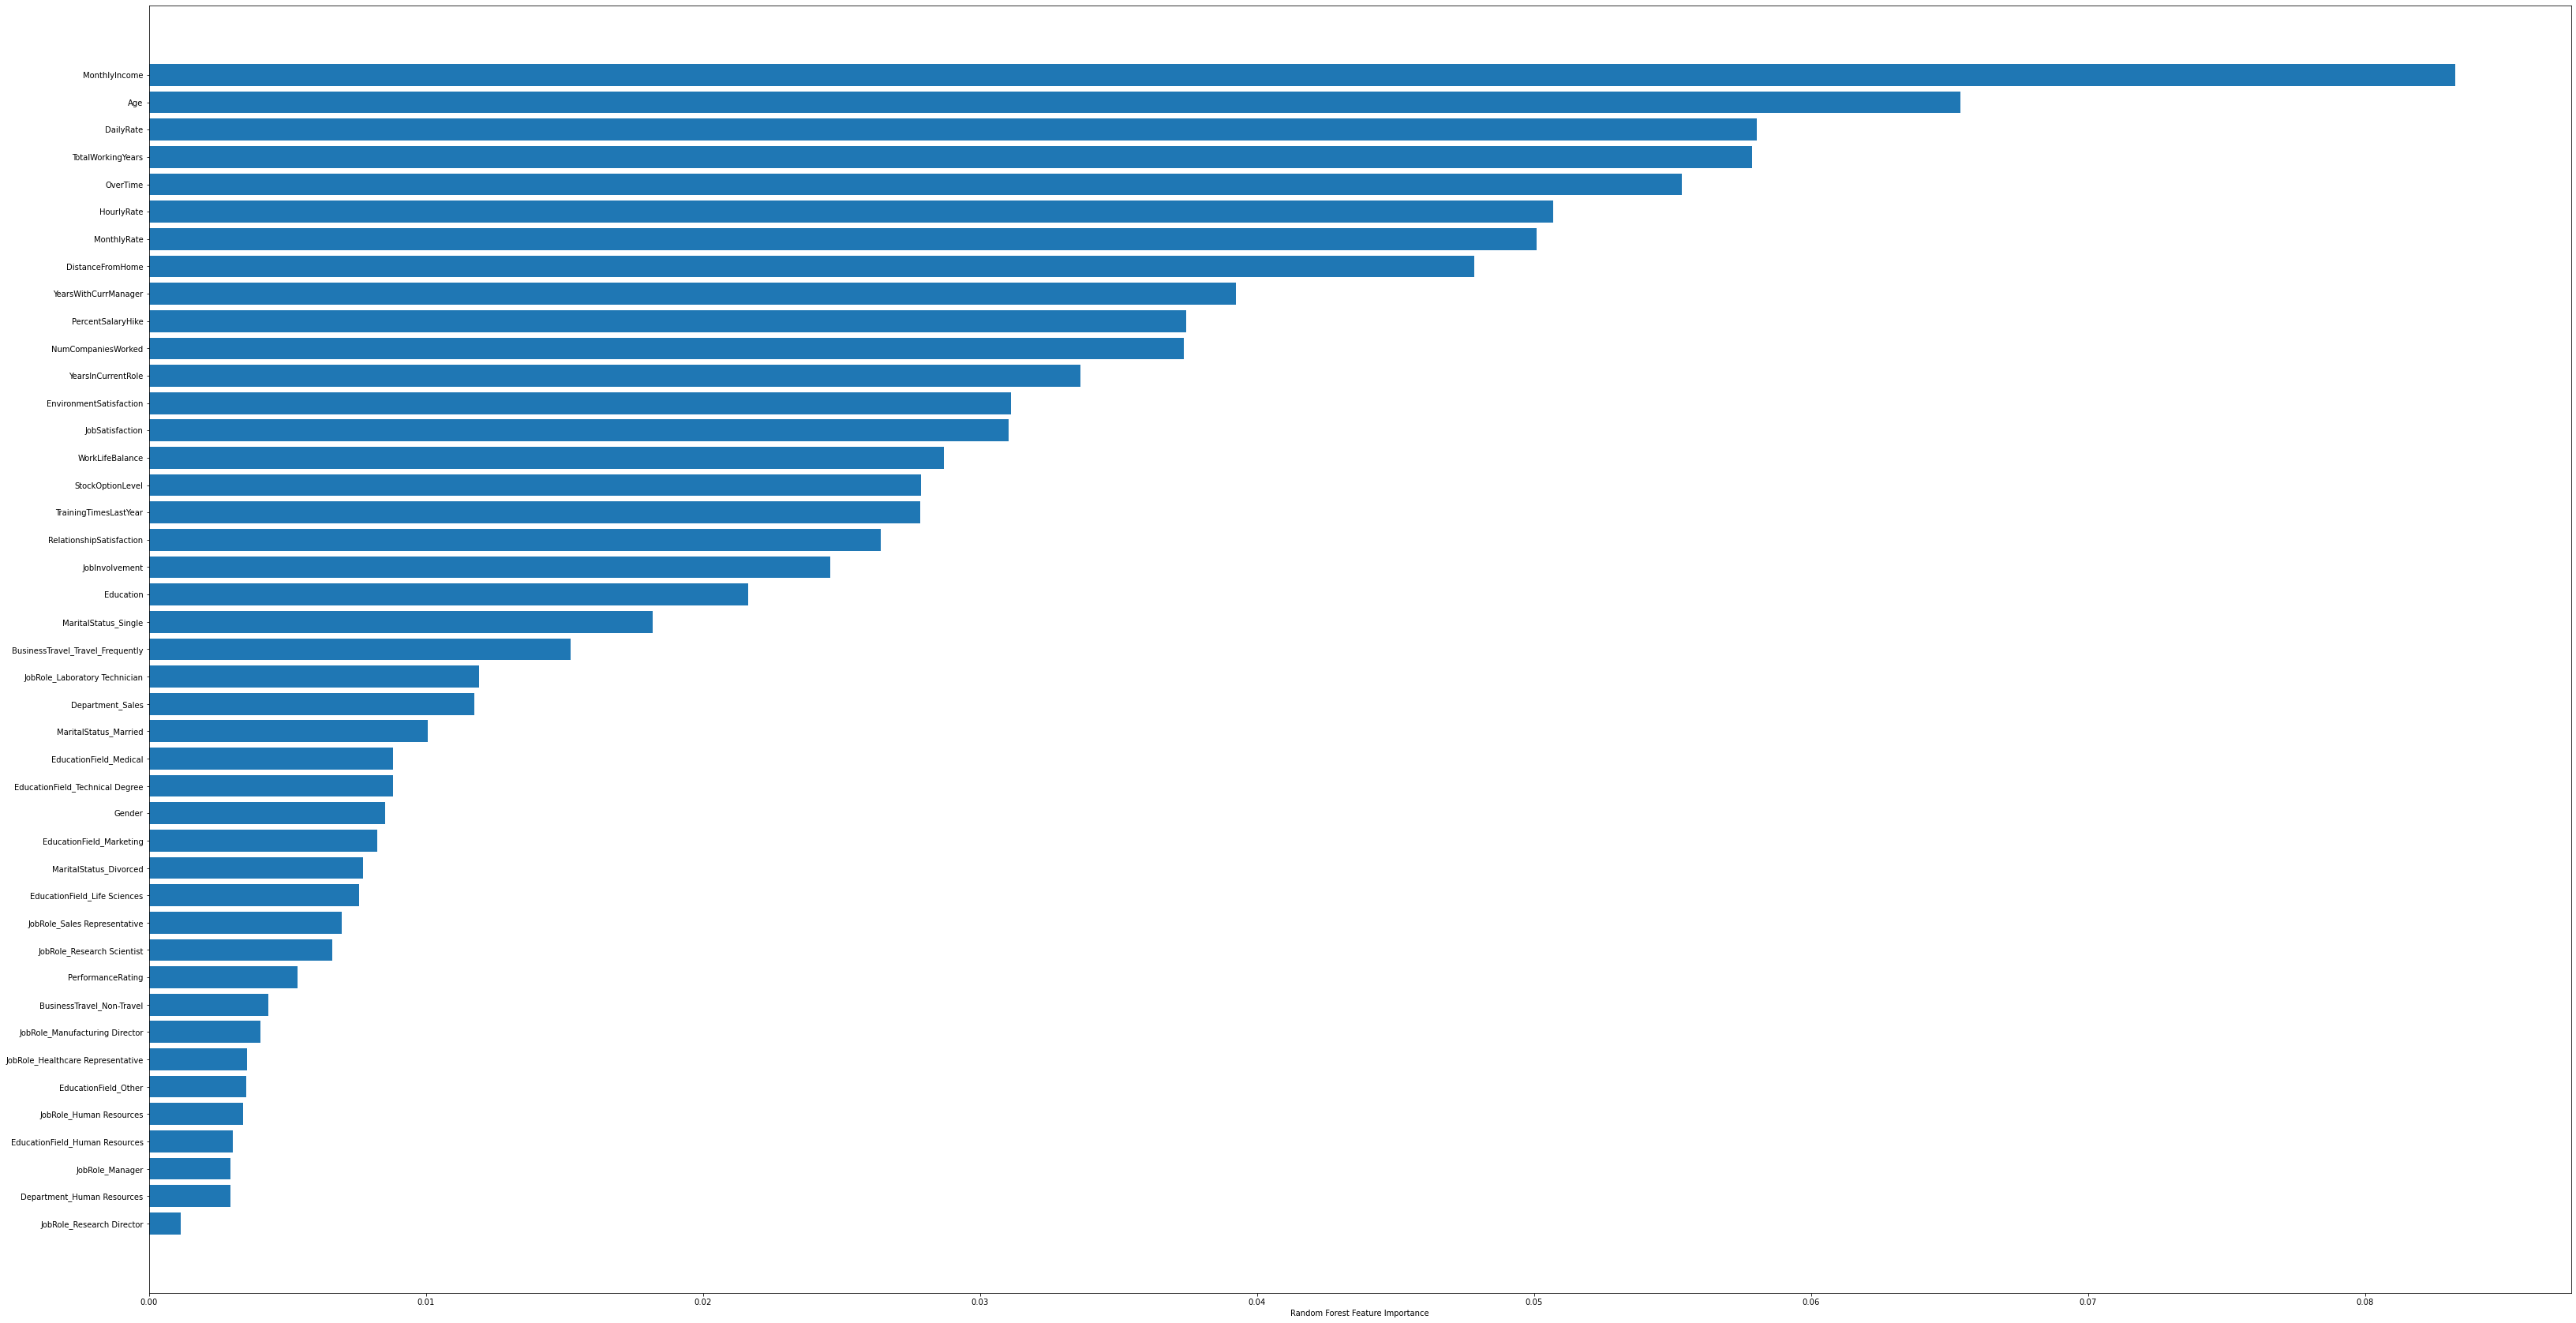

In [79]:
sorted_idx = model_rf.feature_importances_.argsort()
plt.figure(figsize=(55,30))
plt.barh(j[sorted_idx], model_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

###  from above feature importance test we can say that the top 5 features affecting a employee attrition are -

1- MonthlyIncome

2- Age

3- DailyRate

4- TotalWorkingYears

5- Overtime


In [39]:
RandomForestClassifier()

RandomForestClassifier()

In [40]:
#### Randomforestclassifier

param = {'max_depth':[1,2,3,4],
        'max_features':['auto','sqrt'] }

In [41]:
gs_r = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [42]:
gs_r = gs_r.fit(X_train, y_train)
print(accuracy_score(y_train, gs_r.predict(X_train)))
print(accuracy_score(y_test, gs_r.predict(X_test)))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8550170068027211
0.8486394557823129


## TRYING OTHER ALGORITHMS

## Logistic regression

In [43]:
#### base model
model_cl = LogisticRegression()
model_cl = model_cl.fit(X_train , y_train) #### training 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
train_pred = model_cl.predict(X_train)
test_pred  = model_cl.predict(X_test)

In [45]:
### model evaluation
print('Train Accuracy',accuracy_score(y_train, train_pred)) ####
print('Test/validation Accuracy',accuracy_score(y_test, test_pred))

Train Accuracy 0.8954081632653061
Test/validation Accuracy 0.8775510204081632


In [46]:
model_cl

LogisticRegression()

In [47]:
param = {'C':[0.1,1,10],
        'penalty':['l1','l2'] }

gs = GridSearchCV(estimator=model_cl, param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [48]:
## fit
gs = gs.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.89073129        nan 0.88860544        nan 0.88860544]
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
gs.best_score_

0.8907312925170068

In [50]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [51]:
## accuracy on validation dataset
accuracy_score(y_test, gs.predict(X_test))

0.8809523809523809

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.8469387755102041
Testing score:  0.8503401360544217


In [54]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=16)
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  1.0
Testing score:  0.95578231292517


In [55]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [56]:
predictions = model_dt.predict(X_test)

# Model Accuracy
print (model_dt.score(X_test, y_test))
y_actual_result = y_test

0.8945578231292517


In [57]:
print (confusion_matrix(y_test, predictions))

[[481  12]
 [ 50  45]]


In [58]:
accuracy_score(y_test, predictions)

0.8945578231292517

# area under curve

In [59]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

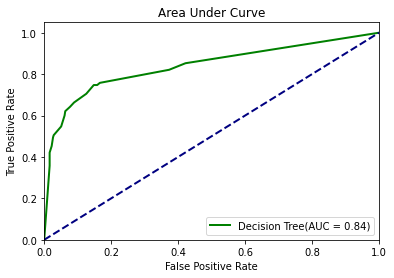

In [60]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# SVM 

In [61]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score:
0.8996598639455783


In [62]:
# linear kernal

In [63]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score:
0.8741496598639455


In [64]:
# polynomial kernal

In [65]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score:
0.9013605442176871


In [66]:
# radial kernal
y_test.shape

(588, 1)

In [67]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score:
0.8996598639455783
